###Exploração

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/DF Cientista de dados Jr.csv')
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
sexo = {
    'female': '1',
    'male': '0'
}
dict(sexo)

{'female': '1', 'male': '0'}

In [ ]:
sim_nao = {
    'yes': 1,
    'no': 0
}
dict(sim_nao)

{'no': 0, 'yes': 1}

In [ ]:
df.Fumante = df.Fumante.map(sim_nao)

In [ ]:
df.Sexo.map(sexo)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: Sexo, Length: 1338, dtype: object

In [ ]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


###Model one

In [ ]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
cols = ['Idade','IMC', 'Fumante']

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [ ]:
simple = df[cols]

simple.head(2)

,Idade,IMC,Fumante
0,49,30.78,0
1,34,25.27,0


In [ ]:
# Separando dados features e target
Y = simple['Fumante']

X = simple.loc[:, 'Idade':'IMC']

In [ ]:
# Separa dados de treino e validação

Xtrain, Xval, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=42)

Xtrain.shape, Xval.shape, y_train.shape, y_val.shape

((669, 2), (669, 2), (669,), (669,))

In [ ]:
#Dados dos fumantes
y_train.value_counts()

0    529
1    140
Name: Fumante, dtype: int64

In [ ]:
# Modelo
model = DecisionTreeClassifier(random_state= 42)
model.fit(Xtrain,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Previsão
pred = model.predict(Xval)

In [ ]:
# Importa métricas
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
#base line para avaliações de comparações
print('average_precision_score :', np.round(average_precision_score(y_val, pred),4))
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),4))

average_precision_score : 0.1967
roc_auc_score : 0.4877


In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline
%pylab inline

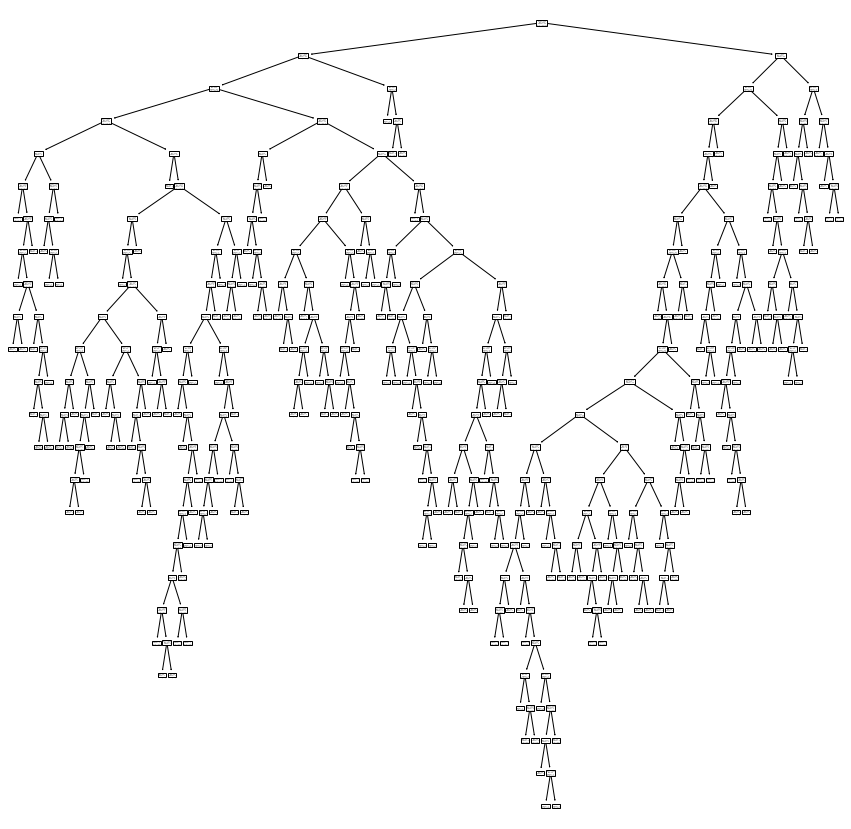

In [ ]:
fig,ax = pylab.subplots(1,1, figsize = (15,15))
plot_tree(model , ax = ax, feature_names = Xtrain.columns);

###Strategy one

In [ ]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
cols = ['Idade','IMC', 'Custos', 'Fumante']

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index(drop=True)

In [ ]:
simple_df = df[cols]
simple_df.head(2)

,Idade,IMC,Custos,Fumante
0,63,35.2,14474.675,0
1,63,36.3,13887.204,0


In [ ]:
# Separando dados features e target
Y = simple_df['Fumante']
X = simple_df.loc[:, 'Idade':'Custos']

In [ ]:
# Separa dados de treino e validação
Xtrain, Xval, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=42)
Xtrain.shape, Xval.shape, y_train.shape, y_val.shape

((669, 3), (669, 3), (669,), (669,))

In [ ]:
# Modelo
model = DecisionTreeClassifier(random_state= 42)
model.fit(Xtrain,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Previsão
pred = model.predict(Xval)

In [ ]:
# Importa métricas
from sklearn.metrics import roc_auc_score, average_precision_score
print('average_precision_score :', np.round(average_precision_score(y_val, pred),4))
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),4))

average_precision_score : 0.8292
roc_auc_score : 0.928


###Strategy two - Tuning

In [ ]:
!pip install scikit-optimize

In [ ]:
#Bayesian Optimization
from skopt import forest_minimize

In [ ]:
def tune_dtree(params):
    print(params)
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    max_features = params[3]
    criterion = params[4]
    
    
    model = DecisionTreeClassifier(max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_features = max_features,
                                  criterion = criterion,
                                  random_state = 42,
                                  class_weight = 'balanced')
    
    
    model.fit(Xtrain,y_train)
    
    pred = model.predict(Xval)
    
    print()
    print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),6))
    print('average_precision_score :', np.round(average_precision_score(y_val, pred),6))
    print()
    
    
    return - average_precision_score(y_val, pred)

space = [(2,30), #max_depth
         (5,30), # min_samples_split
         (1,10), # min_sample_leaf
         (1,3), # max_features
         ('gini','entropy')] # criterion 
         

res = forest_minimize(tune_dtree,
                     space,
                     random_state = 42,
                     n_random_starts = 20,
                     n_calls = 50,
                     verbose = 1)

Iteration No: 1 started. Evaluating function at random point.
[21, 19, 8, 1, 'entropy']

roc_auc_score : 0.94388
average_precision_score : 0.703643

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0126
Function value obtained: -0.7036
Current minimum: -0.7036
Iteration No: 2 started. Evaluating function at random point.
[27, 23, 7, 3, 'gini']

roc_auc_score : 0.964948
average_precision_score : 0.766653

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0102
Function value obtained: -0.7667
Current minimum: -0.7667
Iteration No: 3 started. Evaluating function at random point.
[22, 8, 8, 3, 'gini']

roc_auc_score : 0.964948
average_precision_score : 0.766653

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0110
Function value obtained: -0.7667
Current minimum: -0.7667
Iteration No: 4 started. Evaluating function at random point.
[3, 28, 6, 2, 'gini']

roc_auc_score : 0.965852
average_precision_score : 0.771823

Iteration No:

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 0.3096
Function value obtained: -0.7212
Current minimum: -0.8384
Iteration No: 48 started. Searching for the next optimal point.
[4, 20, 1, 1, 'entropy']

roc_auc_score : 0.953405
average_precision_score : 0.721159



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 0.3030
Function value obtained: -0.7212
Current minimum: -0.8384
Iteration No: 49 started. Searching for the next optimal point.
[4, 23, 2, 1, 'entropy']

roc_auc_score : 0.953405
average_precision_score : 0.721159

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 0.3240
Function value obtained: -0.7212
Current minimum: -0.8384
Iteration No: 50 started. Searching for the next optimal point.
[3, 25, 6, 3, 'entropy']

roc_auc_score : 0.930045
average_precision_score : 0.679891

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 0.3779
Function value obtained: -0.6799
Current minimum: -0.8384


In [ ]:
res.x

[12, 29, 1, 2, 'gini']

In [ ]:
params = res.x
max_depth = params[0]
min_samples_split = params[1]
min_samples_leaf = params[2]
max_features = params[3]
criterion = params[4]


model_dtree = DecisionTreeClassifier(max_depth = max_depth,
                              min_samples_split = min_samples_split,
                              min_samples_leaf = min_samples_leaf,
                              max_features = max_features,
                              criterion = criterion,
                              random_state = 42,
                              class_weight = 'balanced')

model_dtree.fit(Xtrain,y_train)

pred_dtree = model_dtree.predict(Xval)

print()
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred_dtree),6))
print('average_precision_score :', np.round(average_precision_score(y_val, pred_dtree),6))
print()


roc_auc_score : 0.96989
average_precision_score : 0.838405



##**Continuando**

In [ ]:
sexo = {
    'male': 1,
    'female': 0
}

In [ ]:
df.Sexo = df.Sexo.map(sexo)

In [ ]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,38,1,27.835,2,0,northwest,6455.86265
1,40,0,28.120,1,1,northeast,22331.56680
2,18,0,38.665,2,0,northeast,3393.35635
3,19,0,22.515,0,0,northwest,2117.33885
4,24,1,28.500,0,1,northeast,35147.52848


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(['Fumante','Regiao'], axis=1).values
y = df['Fumante'].values

validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]

In [ ]:
from sklearn import tree

classificador_arvore_decisao = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

def validador(X, y):
  validador = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
  for treino_id, teste_id in validador.split(X, y):
    X_train, X_test = X[treino_id], X[teste_id]
    y_train, y_test = y[treino_id], y[teste_id]
  return X_train, X_test, y_train, y_test

In [ ]:
import matplotlib.pyplot as plt

def salvar_arvore(classificador, nome):
  plt.figure(figsize=(200,100))
  tree.plot_tree(classificador, filled=True, fontsize=14)
  plt.savefig(nome)
  plt.close()

In [ ]:
from sklearn import tree

def executar_classificador(classificador, X_train, X_test, y_train):
  arvore = classificador.fit(X_train, y_train)
  y_pred = arvore.predict(X_test)
  return y_pred

In [ ]:
classificador_arvore_decisao = tree.DecisionTreeClassifier()
y_pred_arvore_decisao = executar_classificador(classificador_arvore_decisao, X_train, X_test, y_train)

In [ ]:
#criacao da figura da arvore de decisao
salvar_arvore(classificador_arvore_decisao, "arvore_decisao1.png")

In [ ]:
from sklearn.metrics import accuracy_score

def validar_arvore(y_pred, y_test):
  print(accuracy_score(y_pred, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def validar_arvore(y_test, y_pred):
    print(accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_pred, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def validar_arvore(y_pred, y_test):
  print(accuracy_score(y_pred, y_test))
  print(precision_score(y_pred, y_test))
  print(recall_score(y_pred, y_test))
  print(confusion_matrix(y_pred, y_test))

In [ ]:
#validacao arvore de decisao
validar_arvore(y_pred_arvore_decisao, y_test)

0.9776119402985075
0.9629629629629629
0.9285714285714286
[[105   1]
 [  2  26]]
